Year: 2031, Predicted Market CAGR: 311023550724.6328
Year: 2032, Predicted Market CAGR: 327555768115.9375
Year: 2033, Predicted Market CAGR: 344087985507.2422
Year: 2034, Predicted Market CAGR: 360620202898.5469
Year: 2035, Predicted Market CAGR: 377152420289.85156
Year: 2036, Predicted Market CAGR: 393684637681.15625
Year: 2037, Predicted Market CAGR: 410216855072.46094
Year: 2038, Predicted Market CAGR: 426749072463.7656
Year: 2039, Predicted Market CAGR: 443281289855.0703
Year: 2040, Predicted Market CAGR: 459813507246.375


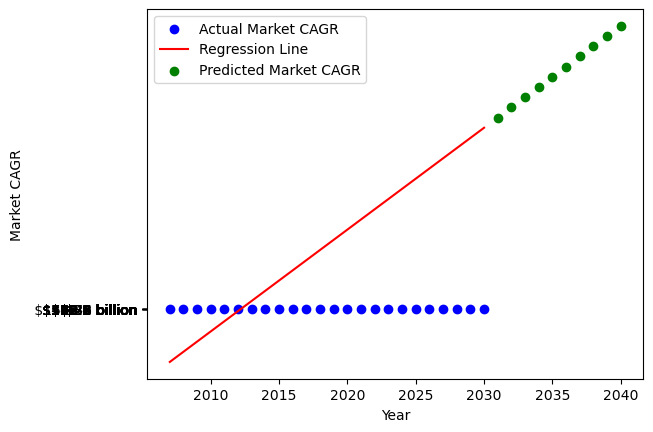

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def currency_to_number(currency_str):
    cleaned_str = currency_str.replace('$', '').strip()

    value_and_unit = list(filter(None, cleaned_str.split(' ')))
    value = float(value_and_unit[0]) * 1e9
   
    return value

file_path = 'fintech.csv'
data = pd.read_csv(file_path)

X = data['Year'].values.reshape(-1, 1)
y = data[' Market CAGR'].values

converted_values = []

for value in y:
    converted_value = currency_to_number(value)
    converted_values.append(converted_value)

model = LinearRegression()
model.fit(X, converted_values)

next_10_years = [[year] for year in range(X[-1][0] + 1, X[-1][0] + 11)]
predictions = model.predict(next_10_years)

for year, prediction in zip(next_10_years, predictions):
    print(f'Year: {year[0]}, Predicted Market CAGR: {prediction}')

plt.scatter(X, y, color='blue', label='Actual Market CAGR')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(next_10_years, predictions, color='green', label='Predicted Market CAGR')

plt.xlabel('Year')
plt.ylabel('Market CAGR')
plt.legend()
plt.show()